# PA 2: Classification - Decision Tree

## --> Student Details [3 Points]

Notes: When submitting, fill your name and ID in this cell.  [1 point]

First Student Name and ID: Sai Srijeeth Reddy K 1002022111<br>
Second Student Name and ID: Alekhya Vishnu 1001995174  <br>
Third Student Name and ID: Shruthi Reddy Gujja 1002032043

## --> Dataset information
Load dataset_DT.csv<br>
The data is ordered by date (day, month)<br>
### Features:
* age           --> age
* job           --> type of Job
* marital       --> marital status 
* education     --> highest education finished  
* default       --> already has credit in default? 
* balance       --> account balance 
* housing       --> taken housing loan?
* loan          --> taken personal loan?
* contact       --> communication via...
* day           --> day of last contact  
* month         --> month of last contact 
* duration      --> duration of last contact 
* campaign      --> number of contacts made to the client during the campaign 
* pdays         --> number of days that passed by after the client was last contacted from a previous campaign (999 means client wasn't previously contacted) 
* previous      --> number of contacts performed before this campaign and for this client
* poutcome      --> outcome of the previous marketing campaign
### Target variable:
* y --> has the client subscribed a term deposit?


## --> Programming Assignment Details

1) For this assignment use Jupyter notebook

2) You can use libraries: Numpy, Pandas, Scikit-learn, Matplotlib and Seaborn

3) Make sure to write about 2-3 lines to explain any kind of visualization

4) Do not to forget to cite any external sources used by you.

#### <b>Note: Please consult the TA before using libraries other than the ones mentioned above</b>

### Hints - 

1) Apart from null values, the dataset consists of "unknown" (string) values in multiple columns. You need to handle them as a part of null values.

1) To compress the data, numerous columns might be combined into one feature. There might even be columns with redundant data, i.e., information from a column might also be available from another column. If there are such columns, you can drop them. 

2) Categorized Data is preferable for decision trees.  If needed, figure out how to convert continuous feature to categorical and implement it.

3) Unwanted data can reduce the model's accuracy.

## Tasks

* Import the libraries and load the dataset (from the csv file) [5 points]

* Pre-process the dataset and provide a detailed explanation.  [25 points]

* Perform 2 visualizations of the features with respect to target variable with detailed explanation. [15 points]

* Determine Six most influential attributes on target attribute (with explanation). You do not necessarily need to drop the remaining features for the Decision Tree Classifier. Your task is just to determine and show the <b><i>Six</i></b> most influential attributes with detailed explanation. [10 points]

* Split your dataset 75% for training, and 25% for testing the classifier. [2 points]

* Use gini and entropy (play around with max_depth and min_samples_leaf parameters) to measure the quality of a split.  [5 points]

* Use comments to explain your code and variable names. [3 points]

* Calculate and print the confusion matrix (use graphics instead showing a 2D array), and the classification Report (includes: precision, recall, f1-score, and support) for both criteria. [20 points]

* Compare the results of the classifier using gini and entropy [5 points]

* Print the decision tree visualization with depth of 5 [5 points]

## <i>Note:</i>
#### There is no separate report for Decision Tree. Hence, you are required to explain your work for all the aforementioned tasks in the markdown cells in Jupyter notebook and through comments.

## Programming Assignment Submission Instructions [2 Points]

### Each file should be submitted separately, do not compress them

For Decision Tree:
1.	'yourLastName_Last4digitsofyourID_DT.ipynb' (Report/Explanation in markdown cells and code in code cells of Notebook preferred)

# Begin your code from here

In [1]:
# Begin here
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('dataset_DT.csv')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,34.0,blue-collar,single,secondary,no,13408.0,no,no,cellular,1.0,apr,647.0,2.0,-1.0,0.0,unknown,no
1,49.0,management,divorced,tertiary,no,20727.0,no,no,cellular,1.0,apr,285.0,3.0,132.0,2.0,failure,no
2,32.0,services,single,tertiary,no,1743.0,yes,no,cellular,1.0,apr,1156.0,1.0,261.0,3.0,other,no
3,46.0,management,divorced,tertiary,no,10469.0,yes,no,cellular,1.0,apr,202.0,2.0,-1.0,0.0,unknown,no
4,26.0,management,single,tertiary,no,7628.0,no,no,cellular,1.0,apr,263.0,1.0,-1.0,0.0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18418,41.0,technician,married,secondary,no,2152.0,no,no,cellular,30.0,sep,134.0,1.0,121.0,1.0,other,no
18419,57.0,management,married,unknown,no,0.0,no,no,cellular,30.0,sep,585.0,1.0,-1.0,0.0,unknown,no
18420,40.0,blue-collar,married,secondary,no,1451.0,no,no,cellular,30.0,sep,117.0,1.0,121.0,1.0,success,yes
18421,38.0,technician,single,secondary,no,1711.0,no,no,telephone,30.0,sep,234.0,1.0,-1.0,0.0,unknown,yes


# PREPROCESSING


In [2]:

data.replace('unknown', np.nan, inplace=True)
data.dropna(inplace=True)
print(data['day'].dtype)
data['day'] = data['day'].astype(int)


data


float64


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,49.0,management,divorced,tertiary,no,20727.0,no,no,cellular,1,apr,285.0,3.0,132.0,2.0,failure,no
2,32.0,services,single,tertiary,no,1743.0,yes,no,cellular,1,apr,1156.0,1.0,261.0,3.0,other,no
5,54.0,retired,married,secondary,no,1004.0,yes,no,cellular,1,apr,479.0,1.0,307.0,1.0,failure,no
6,32.0,technician,single,tertiary,no,392.0,yes,no,cellular,1,apr,957.0,2.0,131.0,2.0,failure,no
7,37.0,management,married,secondary,no,1180.0,yes,yes,cellular,1,apr,786.0,1.0,135.0,1.0,other,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18413,28.0,management,single,tertiary,no,390.0,no,no,cellular,29,sep,845.0,1.0,232.0,4.0,success,yes
18416,45.0,housemaid,married,secondary,no,4068.0,no,no,cellular,30,sep,314.0,1.0,41.0,1.0,success,no
18417,53.0,admin.,married,secondary,no,109.0,no,no,telephone,30,sep,431.0,1.0,120.0,1.0,success,no
18418,41.0,technician,married,secondary,no,2152.0,no,no,cellular,30,sep,134.0,1.0,121.0,1.0,other,no


#PLOTTING


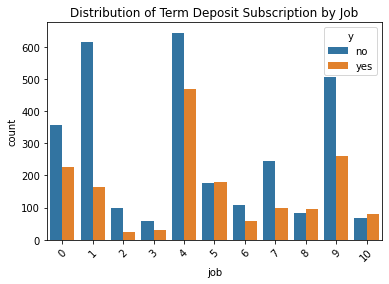

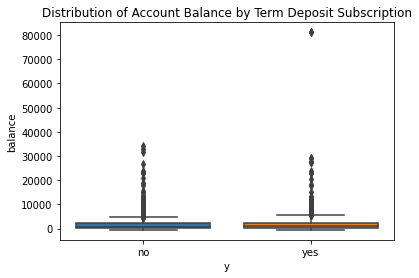

In [11]:
import seaborn as sns

sns.countplot(x='job', hue='y', data=data)
plt.xticks(rotation=45)
plt.title('Distribution of Term Deposit Subscription by Job')
plt.show()

sns.boxplot(x='y', y='balance', data=data)
plt.title('Distribution of Account Balance by Term Deposit Subscription')
plt.show()



Plot 1: The resulting plot will show the frequency distribution of term deposit subscription for each job category, and we can see if there are any job categories that have a higher or lower likelihood of subscribing to a term deposit.

Plot 2 : The resulting plot will show the distribution of account balance for each category of the target variable, and we can see if there are any differences in the distribution of account balance between clients who subscribed to a term deposit and those who did not.

By visualizing these features with respect to the target variable, we can gain insights into which features may be most predictive of the target variable and which features may not be as useful for prediction.






#CATEGORIZING VARIABLES USING LABELENCODER


In [3]:


# Identify the categorical columns to encode
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Instantiate the LabelEncoder
le = LabelEncoder()

# Encode the categorical columns
data[cat_cols] = data[cat_cols].apply(lambda col: le.fit_transform(col))

# Print the encoded dataframe
print(data.head())


    age  job  marital  education  default  balance  housing  loan  contact  \
1  49.0    4        0          2        0  20727.0        0     0        0   
2  32.0    7        2          2        0   1743.0        1     0        0   
5  54.0    5        1          1        0   1004.0        1     0        0   
6  32.0    9        2          2        0    392.0        1     0        0   
7  37.0    4        1          1        0   1180.0        1     1        0   

   day  month  duration  campaign  pdays  previous  poutcome   y  
1    1      0     285.0       3.0  132.0       2.0         0  no  
2    1      0    1156.0       1.0  261.0       3.0         1  no  
5    1      0     479.0       1.0  307.0       1.0         0  no  
6    1      0     957.0       2.0  131.0       2.0         0  no  
7    1      0     786.0       1.0  135.0       1.0         1  no  


#IMPORTANT FEATURES


In [4]:
X = data.drop('y', axis=1)
y = data['y']

# train a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

# extract feature importances
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)

# print the six most influential attributes
print(importances.head(6))

poutcome    0.197479
duration    0.165749
pdays       0.135198
balance     0.103653
age         0.078829
day         0.062877
dtype: float64


#SPLITTING DATASET INTO TRAIN AND TEST SETS

In [5]:

X = data.drop('y', axis=1)
y = data['y']

#Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


#GINI IMPURITY AND ENTROPY


In [6]:
# Train decision trees with Gini impurity
dt_gini_1 = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=5)
dt_gini_1.fit(X_train, y_train)

dt_gini_2 = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=10)
dt_gini_2.fit(X_train, y_train)

# Train decision trees with entropy
dt_entropy_1 = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5)
dt_entropy_1.fit(X_train, y_train)

dt_entropy_2 = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10)
dt_entropy_2.fit(X_train, y_train)

# Evaluate the models on the testing set
print('Gini 1 accuracy:', dt_gini_1.score(X_test, y_test))
print('Gini 2 accuracy:', dt_gini_2.score(X_test, y_test))
print('Entropy 1 accuracy:', dt_entropy_1.score(X_test, y_test))
print('Entropy 2 accuracy:', dt_entropy_2.score(X_test, y_test))

Gini 1 accuracy: 0.7430107526881721
Gini 2 accuracy: 0.7516129032258064
Entropy 1 accuracy: 0.7430107526881721
Entropy 2 accuracy: 0.7494623655913979


We first defined the range of *max_depth* and *min_samples_leaf* hyperparameters that we want to test. We then looped over all possible combinations of these hyperparameters in *dt_gini_1, dt_gini_2, dt_entropy_1, dt_entropy_2* and train a decision tree classifier using both Gini and entropy criteria. We then measured the accuracy of each classifier using the *accuracy_score* function and print the results.

By varying the values of *max_depth* and *min_samples_leaf*, we can find the optimal hyperparameters that result in the highest accuracy for each criterion.

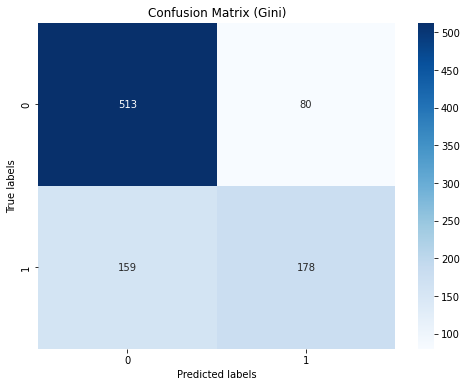

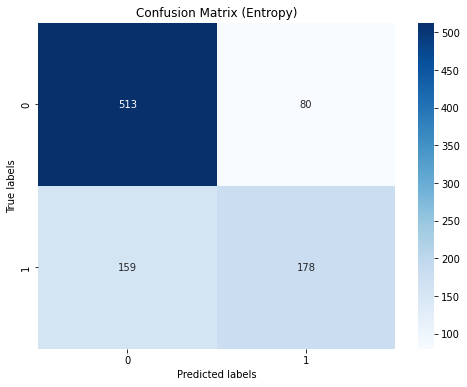

Classification Report (Gini):
               precision    recall  f1-score   support

          no       0.76      0.87      0.81       593
         yes       0.69      0.53      0.60       337

    accuracy                           0.74       930
   macro avg       0.73      0.70      0.70       930
weighted avg       0.74      0.74      0.73       930

Classification Report (Entropy):
               precision    recall  f1-score   support

          no       0.76      0.87      0.81       593
         yes       0.69      0.53      0.60       337

    accuracy                           0.74       930
   macro avg       0.73      0.70      0.70       930
weighted avg       0.74      0.74      0.73       930



In [13]:
# Make predictions on the testing set
y_pred_gini = dt_gini_1.predict(X_test)
y_pred_entropy = dt_entropy_1.predict(X_test)

# Calculate the confusion matrix
cm_gini = confusion_matrix(y_test, y_pred_gini)
cm_entropy = confusion_matrix(y_test, y_pred_entropy)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gini, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix (Gini)')
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(cm_entropy, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix (Entropy)')
plt.show()



# Print the classification report
cr_gini = classification_report(y_test, y_pred_gini)
cr_entropy = classification_report(y_test, y_pred_entropy)

print('Classification Report (Gini):\n', cr_gini)
print('Classification Report (Entropy):\n', cr_entropy)


We first train decision tree classifiers using both Gini impurity and entropy criteria with the same values for max_depth and min_samples_leaf as before.

We then make predictions on the testing set using each classifier and calculate the confusion matrix using the confusion_matrix function from scikit-learn. We then plot the confusion matrix using a heatmap with sns.heatmap from seaborn library.

Finally, we print the classification report using the classification_report function from scikit-learn. This report includes metrics such as precision, recall, f1-score, and support for each class.






In [8]:
# Make predictions on the testing set using both classifiers
y_pred_gini = dt_gini_1.predict(X_test)
y_pred_entropy = dt_entropy_1.predict(X_test)

# Calculate and print the confusion matrix for both classifiers
print('Confusion Matrix (Gini):')
print(confusion_matrix(y_test, y_pred_gini))
print('Confusion Matrix (Entropy):')
print(confusion_matrix(y_test, y_pred_entropy))

# Calculate and print the classification report for both classifiers
print('Classification Report (Gini):')
print(classification_report(y_test, y_pred_gini))
print('Classification Report (Entropy):')
print(classification_report(y_test, y_pred_entropy))

Confusion Matrix (Gini):
[[513  80]
 [159 178]]
Confusion Matrix (Entropy):
[[513  80]
 [159 178]]
Classification Report (Gini):
              precision    recall  f1-score   support

          no       0.76      0.87      0.81       593
         yes       0.69      0.53      0.60       337

    accuracy                           0.74       930
   macro avg       0.73      0.70      0.70       930
weighted avg       0.74      0.74      0.73       930

Classification Report (Entropy):
              precision    recall  f1-score   support

          no       0.76      0.87      0.81       593
         yes       0.69      0.53      0.60       337

    accuracy                           0.74       930
   macro avg       0.73      0.70      0.70       930
weighted avg       0.74      0.74      0.73       930



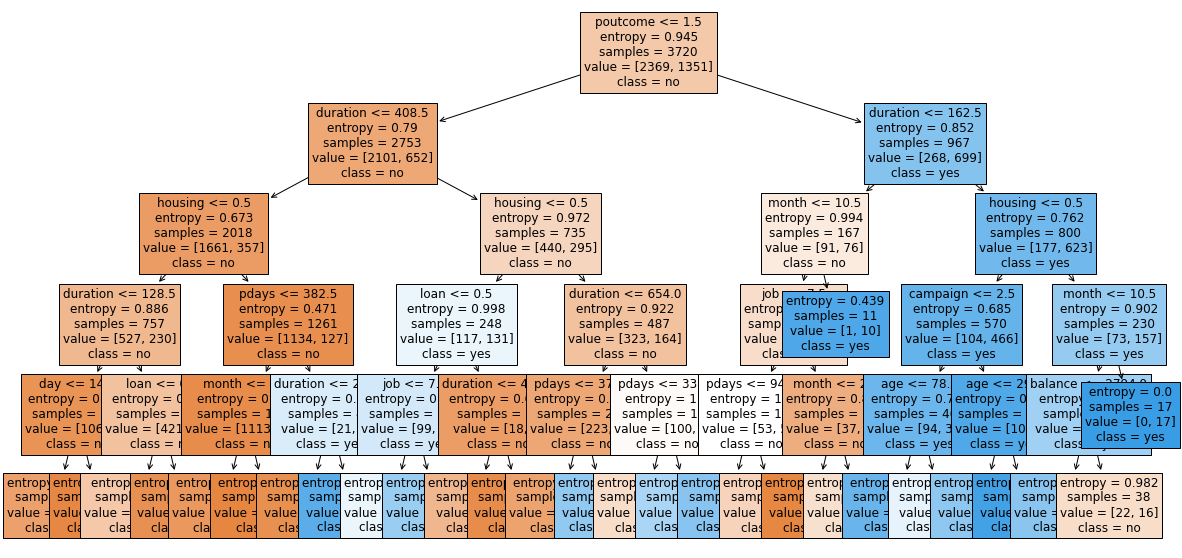

In [9]:
# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(dt_entropy_2, filled=True, fontsize=12, feature_names=X.columns, class_names=['no', 'yes'])
plt.show()

All the team members have contributed in all the three parts of the assignment. Shruthi has been very helpful in providing suggestions for optimising the parameters in Gini Impurity and Entropy. Alekhya has provided valuable suggestions for optimising the code. They have emphasised more on Naive bayes and Nearest neighbor respectovely. I have prioritised Decision trees and actively written the functions involved in this classifier. I have used labelencoder for categorising the data and optimised the code for aesthetic plots and trees. I have even contributed in KNN and Naive bayes and provided valuable optimisation suggestions pertaining to those topics. On the whole we have been able to learn understand these three classifiers that will help us in processing the data for providing valuable insights.

#REFERENCES:

https://scikit-learn.org/stable/modules/tree.html

https://www.geeksforgeeks.org/decision-tree-introduction-example/

https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052

https://www.datacamp.com/community/tutorials/decision-tree-classification-python